In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
file_path = 'data/file1.hdf5'

In [3]:
# Code to print out the keys used in each waveform
with h5py.File(file_path, 'r') as f:
    for key in f.keys():
        print(key)

detector
id
raw_waveform
run_number
tp0


In [4]:
# Selecting a random index and extracting the waveform
with h5py.File(file_path, 'r') as file:
    data = np.array(file['raw_waveform'])
    random_index = np.random.choice(data.shape[0])
    tp = np.array(file['tp0'])
    waveform = data[random_index]
    tp0 = tp[random_index]
    y = (np.array(file['run_number']))

<function matplotlib.pyplot.show(close=None, block=None)>

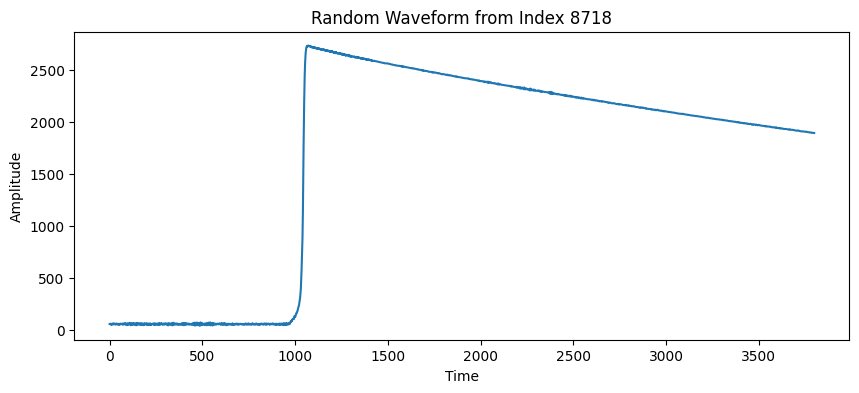

In [5]:
# Plotting waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform)
plt.title(f"Random Waveform from Index {random_index}")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show

In [8]:
# Returning the argmax to be used to find the peak of the waveform for 
np.argmax(waveform)

1081

In [9]:
# Returning the argmin that can be used to find the start of the energy peak
np.argmin(waveform)

7

In [10]:
# Function to find the max of the waveform
def max_tp(waveform):
    tp100 = np.argmax(waveform)
    return tp100
# Function that finds the time of an percentage of the max of the waveform
def tp(waveform, percent):
    tp100 = max_tp(waveform)
    tp100_val = waveform[tp100]
    tp_val = waveform[tp0] + (tp100_val * percent)
    tp = np.argmin(np.abs(waveform[tp0:] - tp_val))
    tp = tp + tp0
    return tp

In [11]:
tp100 = max_tp(waveform)
tp100_val = waveform[tp100]

In [12]:
tp50_val = waveform[tp0] + (tp100_val *.5)

In [13]:
tp50 = np.argmin(np.abs(waveform - tp50_val))
waveform[tp(waveform, .5)]

3164.0

In [14]:
# Finds the area of the waveform after 80% of the waveform
def LQ80(waveform):
    tp80 = tp(waveform, .8)
    threshold = waveform[tp80]
    crossing_index = np.where(waveform >= threshold)[0][-1]
    charge_after_80 = np.sum(waveform[crossing_index:])

In [6]:
# Function that extracts the amount of area growth by subtracting the original area from
# the area of the max from that time.
def area_growth_rate(waveform):
    tp80 = tp(waveform, .8)
    threshold = waveform[tp80]
    crossing_index = np.where(waveform >= threshold)[0][0]
    window_start = crossing_index
    window_end = np.argmax(waveform)

    actual_area = np.sum(waveform[window_start:window_end+1])
    average_tail = np.linspace(waveform[window_start], waveform[window_end], window_end - window_start + 1)
    average_area = np.sum(average_tail)

    AGR = actual_area - average_area
    return AGR

In [17]:
# Function that extracts the number of inflection points from the waveform during the growth
def inflection_points(waveform):
    tp80 = tp(waveform, .8)
    threshold = waveform[tp80]
    crossing_index = np.where(waveform >= threshold)[0][0]
    LQ80 = waveform[crossing_index:tp100]
    num = tp100 - crossing_index
    x = crossing_index + np.arange(1, num + 1)
    second = np.gradient(np.gradient(LQ80))
    sign_changes = np.diff(np.sign(second))
    inflection_points = np.where((sign_changes == 2) | (sign_changes == -2))[0]
    return len(inflection_points)
    
inflection_points(waveform)

2

In [43]:
pz_charge - charge_after_80

4414.0